# Simple iris flower dataset for exploration and classification

## Iris species classification

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/iris-flower-dataset/IRIS.csv


In [3]:
df = pd.read_csv('../input/iris-flower-dataset/IRIS.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [8]:
df['species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

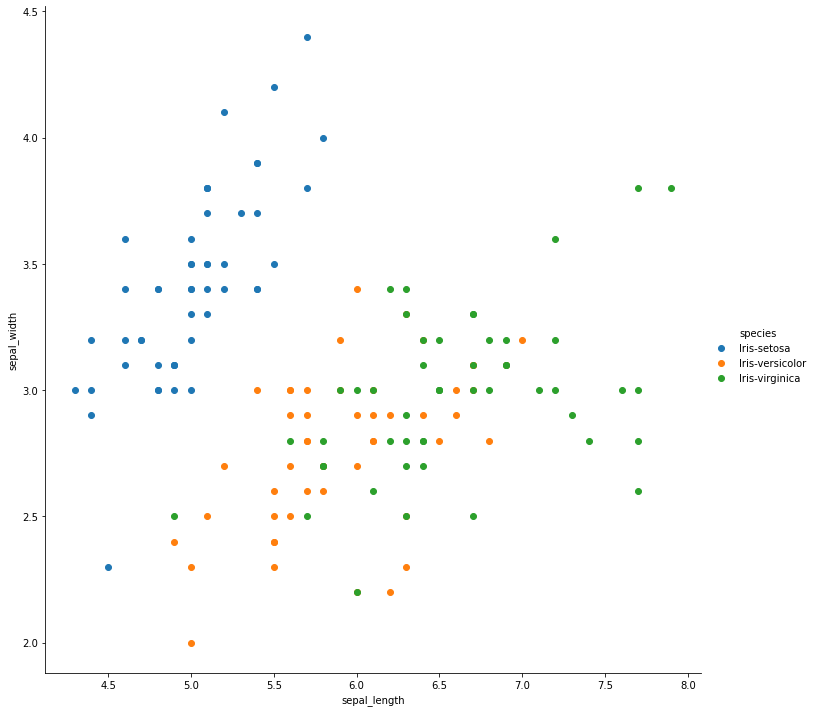

In [9]:
# scatter plot of sepal length by sepal width
sns.FacetGrid(df, hue= 'species', height = 10) \
   .map(plt.scatter, 'sepal_length', 'sepal_width') \
   .add_legend()

## For the setosa species, the sepal length is usually much shorter than the other 2 species.
## Additionally, the versicolor and virginica species have a lot of overlap with these 2 variables.

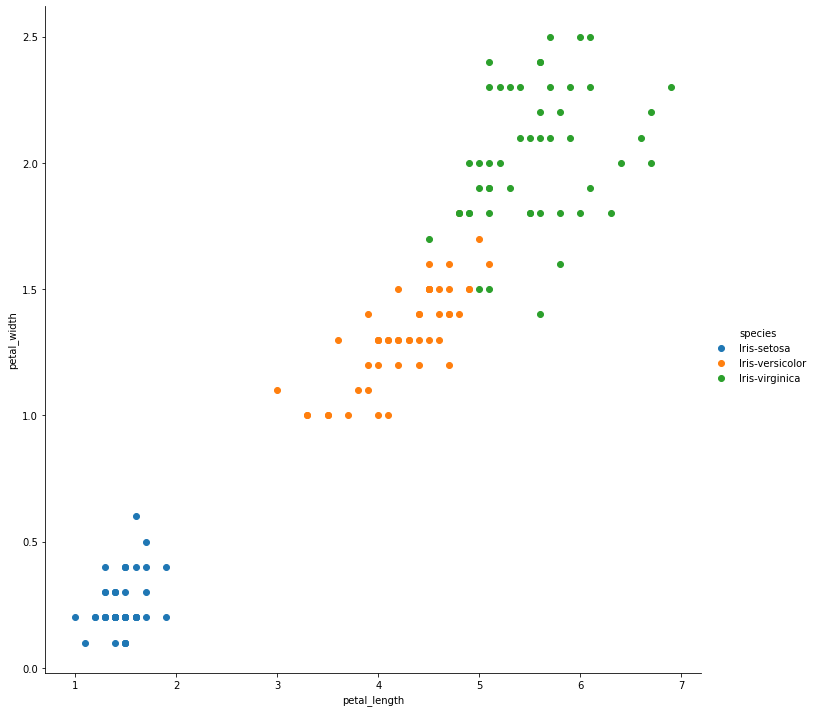

In [10]:
# scatter plot of petal length by petal width
sns.FacetGrid(df, hue= 'species', height = 10) \
   .map(plt.scatter, 'petal_length', 'petal_width') \
   .add_legend()

## There is now a lot of separation between the species.  The setosa species has the smallets petals,
## followed by the versicolor and virginica that have the largest petals.

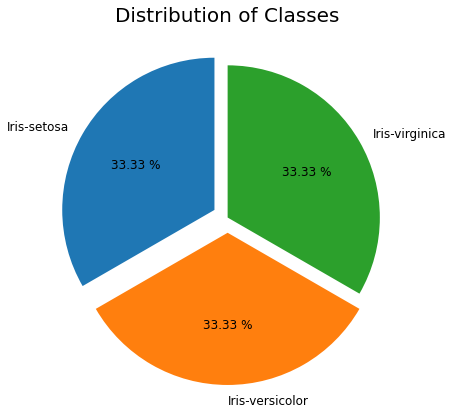

In [11]:
count_list = [(df.species == 'Iris-setosa').sum(), (df.species == 'Iris-versicolor').sum(), (df.species == 'Iris-virginica').sum()]
label_list = list(df['species'].unique())
plt.figure(figsize = (10, 7))
plt.pie(count_list, labels = label_list, autopct = "%.2f %%", startangle = 90, explode = (0.1, 0.1, 0.0), textprops = {'fontsize': 12})
plt.title('Distribution of Classes', fontsize = 20)
plt.show()

<AxesSubplot:xlabel='species', ylabel='sepal_width'>

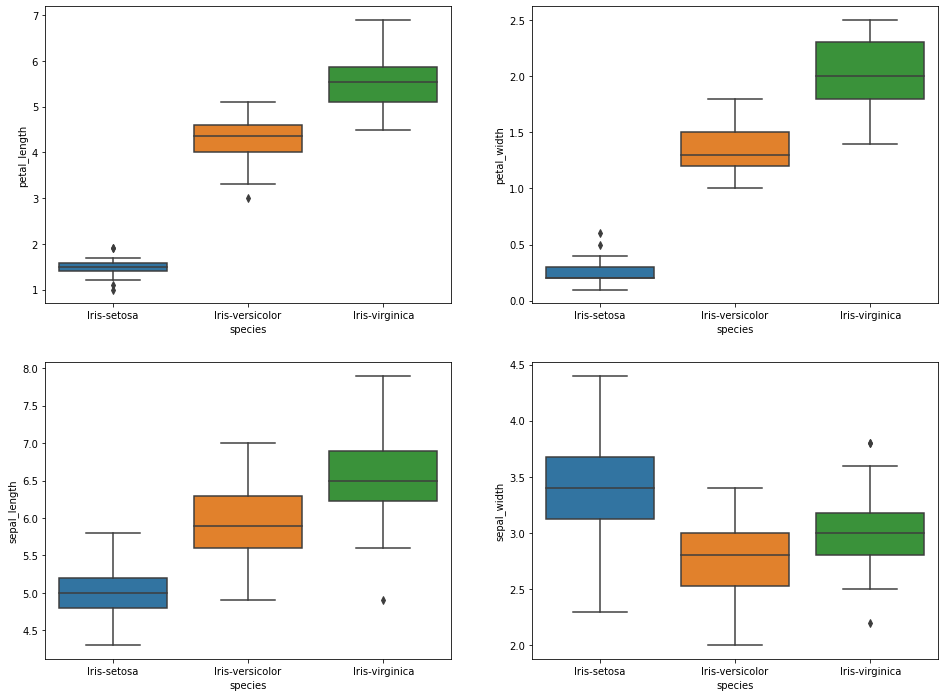

In [12]:
# Look at boxplots of the data.
plt.figure(figsize=(16,12))
plt.subplot(2,2,1)
sns.boxplot(x='species',y='petal_length',data=df)
plt.subplot(2,2,2)
sns.boxplot(x='species',y='petal_width',data=df)
plt.subplot(2,2,3)
sns.boxplot(x='species',y='sepal_length',data=df)
plt.subplot(2,2,4)
sns.boxplot(x='species',y='sepal_width',data=df)

## May be easier to see the trends across species by the 4 variables with 4 boxplots.

## Create some features

In [13]:
# categorize flowers as small (0), medium (1), or big (2)

In [14]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [15]:
df['sepal_length'].describe()

count    150.000000
mean       5.843333
std        0.828066
min        4.300000
25%        5.100000
50%        5.800000
75%        6.400000
max        7.900000
Name: sepal_length, dtype: float64

In [16]:
df['sepal_length_CAT'] = pd.cut(df['sepal_length'], 3)
print(df['sepal_length_CAT'])

0      (4.296, 5.5]
1      (4.296, 5.5]
2      (4.296, 5.5]
3      (4.296, 5.5]
4      (4.296, 5.5]
           ...     
145      (5.5, 6.7]
146      (5.5, 6.7]
147      (5.5, 6.7]
148      (5.5, 6.7]
149      (5.5, 6.7]
Name: sepal_length_CAT, Length: 150, dtype: category
Categories (3, interval[float64, right]): [(4.296, 5.5] < (5.5, 6.7] < (6.7, 7.9]]


In [17]:
df['sepal_width'].describe()

count    150.000000
mean       3.054000
std        0.433594
min        2.000000
25%        2.800000
50%        3.000000
75%        3.300000
max        4.400000
Name: sepal_width, dtype: float64

In [18]:
df['sepal_width_CAT'] = pd.cut(df['sepal_width'], 3)
print(df['sepal_width_CAT'])

0        (2.8, 3.6]
1        (2.8, 3.6]
2        (2.8, 3.6]
3        (2.8, 3.6]
4        (2.8, 3.6]
           ...     
145      (2.8, 3.6]
146    (1.998, 2.8]
147      (2.8, 3.6]
148      (2.8, 3.6]
149      (2.8, 3.6]
Name: sepal_width_CAT, Length: 150, dtype: category
Categories (3, interval[float64, right]): [(1.998, 2.8] < (2.8, 3.6] < (3.6, 4.4]]


In [19]:
df['petal_length'].describe()

count    150.000000
mean       3.758667
std        1.764420
min        1.000000
25%        1.600000
50%        4.350000
75%        5.100000
max        6.900000
Name: petal_length, dtype: float64

In [20]:
df['petal_length_CAT'] = pd.cut(df['petal_length'], 3)
print(df['petal_length_CAT'])

0      (0.994, 2.967]
1      (0.994, 2.967]
2      (0.994, 2.967]
3      (0.994, 2.967]
4      (0.994, 2.967]
            ...      
145      (4.933, 6.9]
146      (4.933, 6.9]
147      (4.933, 6.9]
148      (4.933, 6.9]
149      (4.933, 6.9]
Name: petal_length_CAT, Length: 150, dtype: category
Categories (3, interval[float64, right]): [(0.994, 2.967] < (2.967, 4.933] < (4.933, 6.9]]


In [21]:
df['petal_width'].describe()

count    150.000000
mean       1.198667
std        0.763161
min        0.100000
25%        0.300000
50%        1.300000
75%        1.800000
max        2.500000
Name: petal_width, dtype: float64

In [22]:
df['petal_width_CAT'] = pd.cut(df['petal_width'], 3)
print(df['petal_width_CAT'])

0      (0.0976, 0.9]
1      (0.0976, 0.9]
2      (0.0976, 0.9]
3      (0.0976, 0.9]
4      (0.0976, 0.9]
           ...      
145       (1.7, 2.5]
146       (1.7, 2.5]
147       (1.7, 2.5]
148       (1.7, 2.5]
149       (1.7, 2.5]
Name: petal_width_CAT, Length: 150, dtype: category
Categories (3, interval[float64, right]): [(0.0976, 0.9] < (0.9, 1.7] < (1.7, 2.5]]


In [23]:
df['petal_area'] = df['petal_width']*df['petal_length']
print(df['petal_area'])

0       0.28
1       0.28
2       0.26
3       0.30
4       0.28
       ...  
145    11.96
146     9.50
147    10.40
148    12.42
149     9.18
Name: petal_area, Length: 150, dtype: float64


In [24]:
df['sepal_area'] = df['sepal_width']*df['sepal_length']
print(df['sepal_area'])

0      17.85
1      14.70
2      15.04
3      14.26
4      18.00
       ...  
145    20.10
146    15.75
147    19.50
148    21.08
149    17.70
Name: sepal_area, Length: 150, dtype: float64


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   sepal_length      150 non-null    float64 
 1   sepal_width       150 non-null    float64 
 2   petal_length      150 non-null    float64 
 3   petal_width       150 non-null    float64 
 4   species           150 non-null    object  
 5   sepal_length_CAT  150 non-null    category
 6   sepal_width_CAT   150 non-null    category
 7   petal_length_CAT  150 non-null    category
 8   petal_width_CAT   150 non-null    category
 9   petal_area        150 non-null    float64 
 10  sepal_area        150 non-null    float64 
dtypes: category(4), float64(6), object(1)
memory usage: 9.5+ KB


## species is still the target but we've now got some engineered features.
## let's turn our species target into a numerical category code:

In [26]:
df['species'] = df['species'].astype('category').cat.codes # factorize the response
## could do this instead to encode the response as label:
# label_encoder = LabelEncoder()
# y = label_encoder.fit_transform(y)

In [27]:
# let's also factorize the intervals
df['sepal_length_CAT'] = df['sepal_length_CAT'].astype('category').cat.codes
df['sepal_width_CAT'] = df['sepal_width_CAT'].astype('category').cat.codes
df['petal_length_CAT'] = df['petal_length_CAT'].astype('category').cat.codes
df['petal_width_CAT'] = df['petal_width_CAT'].astype('category').cat.codes


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   sepal_length      150 non-null    float64
 1   sepal_width       150 non-null    float64
 2   petal_length      150 non-null    float64
 3   petal_width       150 non-null    float64
 4   species           150 non-null    int8   
 5   sepal_length_CAT  150 non-null    int8   
 6   sepal_width_CAT   150 non-null    int8   
 7   petal_length_CAT  150 non-null    int8   
 8   petal_width_CAT   150 non-null    int8   
 9   petal_area        150 non-null    float64
 10  sepal_area        150 non-null    float64
dtypes: float64(6), int8(5)
memory usage: 7.9 KB


In [29]:
df.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species,sepal_length_CAT,sepal_width_CAT,petal_length_CAT,petal_width_CAT,petal_area,sepal_area
0,5.1,3.5,1.4,0.2,0,0,1,0,0,0.28,17.85
1,4.9,3.0,1.4,0.2,0,0,1,0,0,0.28,14.70
2,4.7,3.2,1.3,0.2,0,0,1,0,0,0.26,15.04


In [30]:
X = df.drop(['species'], axis=1)
y = df['species']
print(X, "\n\n", y)

     sepal_length  sepal_width  petal_length  petal_width  sepal_length_CAT  \
0             5.1          3.5           1.4          0.2                 0   
1             4.9          3.0           1.4          0.2                 0   
2             4.7          3.2           1.3          0.2                 0   
3             4.6          3.1           1.5          0.2                 0   
4             5.0          3.6           1.4          0.2                 0   
..            ...          ...           ...          ...               ...   
145           6.7          3.0           5.2          2.3                 1   
146           6.3          2.5           5.0          1.9                 1   
147           6.5          3.0           5.2          2.0                 1   
148           6.2          3.4           5.4          2.3                 1   
149           5.9          3.0           5.1          1.8                 1   

     sepal_width_CAT  petal_length_CAT  petal_width

In [31]:
from sklearn.preprocessing import StandardScaler

In [32]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify = y, random_state = 22)

# Classification Report

> A classification report is a performance evaluation metric in machine learning. It is used to show the precision, recall, F1 Score, and support of your trained classification model. Some of the common terms associated with a classification report are as follows:

> Precision: Precision is defined as the ratio of true positives to the sum of true and false positives.
> Recall: Recall is defined as the ratio of true positives to the sum of true positives and false negatives.
> F1 Score: The F1 Score is the weighted harmonic mean of precision and recall. The closer the value of the F1 score is to 1.0, the better the expected performance of the model is.
Support: Support is the number of actual occurrences of the classes in the dataset. It doesn’t vary between models, it just diagnoses the performance evaluation process.

In [35]:
def generate_results(model, predictions, name):
    cl_rep = classification_report(y_test, predictions)
    print("\nThe classification report for " + name + " is:", cl_rep, sep = "\n")
    cm_model = confusion_matrix(y_test, predictions)
    plt.figure(figsize = (8, 6))
    sns.heatmap(cm_model, annot = True, cmap = 'Blues', annot_kws = {'size': 15}, square = True)
    plt.title('Confusion Matrix for ' + name, size = 15)
    plt.xticks(size = 15)
    plt.yticks(size = 15)
    plt.show()    

# Logistic Regression

In [36]:
from sklearn.linear_model import LogisticRegression

In [37]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

The accuracy for Logistic Regression is: 93.33333333333333 %

The classification report for Logistic Regression is:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.88      0.93      0.90        15
           2       0.93      0.87      0.90        15

    accuracy                           0.93        45
   macro avg       0.93      0.93      0.93        45
weighted avg       0.93      0.93      0.93        45



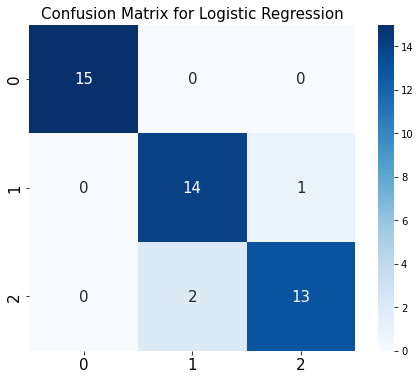

In [38]:
log = LogisticRegression()

log.fit(X_train, y_train)
y_pred = log.predict(X_test)
acc_log = log.score(X_test, y_test)
print("The accuracy for Logistic Regression is:", acc_log * 100, "%")
generate_results(log, y_pred, 'Logistic Regression')